In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
netflix=pd.read_csv("netflix_titles.csv")

In [3]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
netflix.shape

(8807, 12)

In [6]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [10]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [12]:
netflix.nunique() #tekrar etmeyen verileirn sayısı

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [13]:
data=netflix.copy() 

In [22]:
data=data.dropna()

In [23]:
data.shape

(5332, 12)

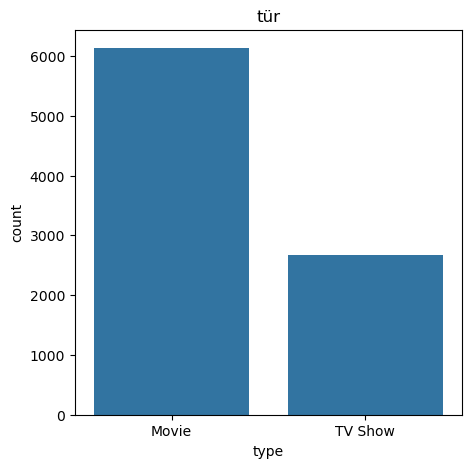

In [29]:
sns.countplot(x=netflix["type"])
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.title("tür")
plt.show()

C:\Users\merve\AppData\Local\Temp\ipykernel_20884\2831260293.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot=sns.countplot(x=netflix["rating"],palette="Set2")
C:\Users\merve\AppData\Local\Temp\ipykernel_20884\2831260293.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(),rotation=90,ha="right") #etiketler sağa hizalanır


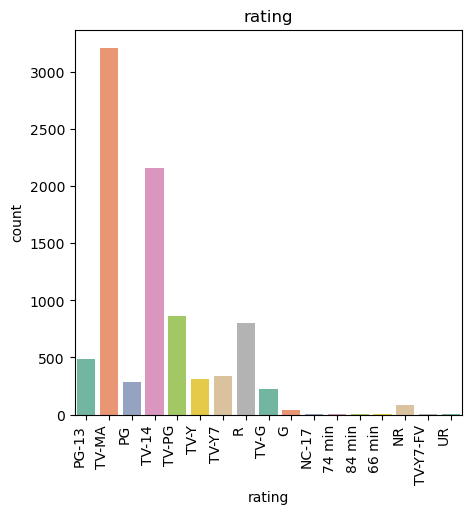

In [44]:
plot=sns.countplot(x=netflix["rating"],palette="Set2")
plot.set_xticklabels(plot.get_xticklabels(),rotation=90,ha="right") #etiketler sağa hizalanır
fig=plt.gcf()                    #rotatiton=90 etiketlerin dikey hizalanmasını sağlar.
fig.set_size_inches(5,5)
plt.title("rating")    
plt.show()

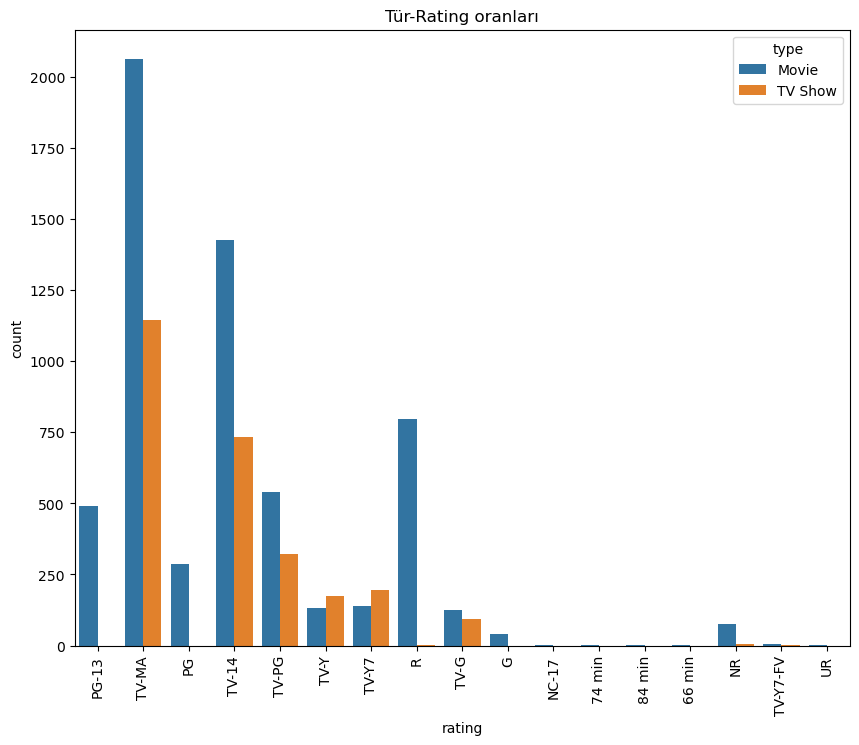

In [56]:
plt.figure(figsize=(10,8))
sns.countplot(x="rating",hue="type",data=netflix)
plt.xticks(rotation=90)
plt.title("Tür-Rating oranları")
plt.show()

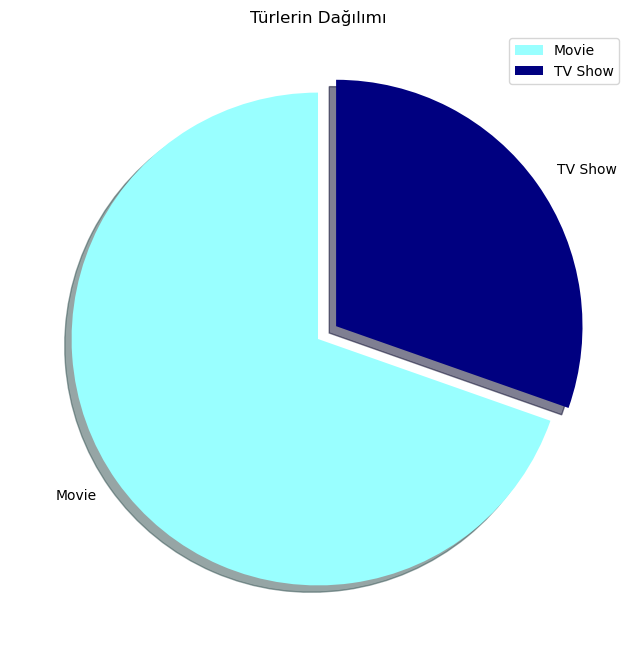

In [67]:
labels=["Movie","TV Show"]
size=netflix["type"].value_counts()
colors=["#99FFFF","#000080"]
explode=[0,0.09]  #pasta dilimlerini birbirinden ayırmak için
plt.rcParams["figure.figsize"]=(8,8)
plt.pie(size,labels=labels,colors=colors,explode=explode,shadow=True,startangle=90)
plt.title("Türlerin Dağılımı")
plt.legend()   #renklerin hangi türü götüsterdiğini belirtir.
plt.show()

In [69]:
pip install WordCloud

   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.4 kB 435.7 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/301.4 kB 393.8 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/301.4 kB 585.1 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/301.4 kB 602.4 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/301.4 kB 610.6 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/301.4 kB 610.6 kB/s eta 0:00:01
   ------------------- ------------------ 153.6/301.4 kB 437.1 kB/s eta 0:00:01
   --------------------------------- ---- 266.2/301.4 kB 682.7 kB/s eta 0:00:01
   -------------------------------------- 301.4/301.4 kB 689.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [71]:
from wordcloud import WordCloud

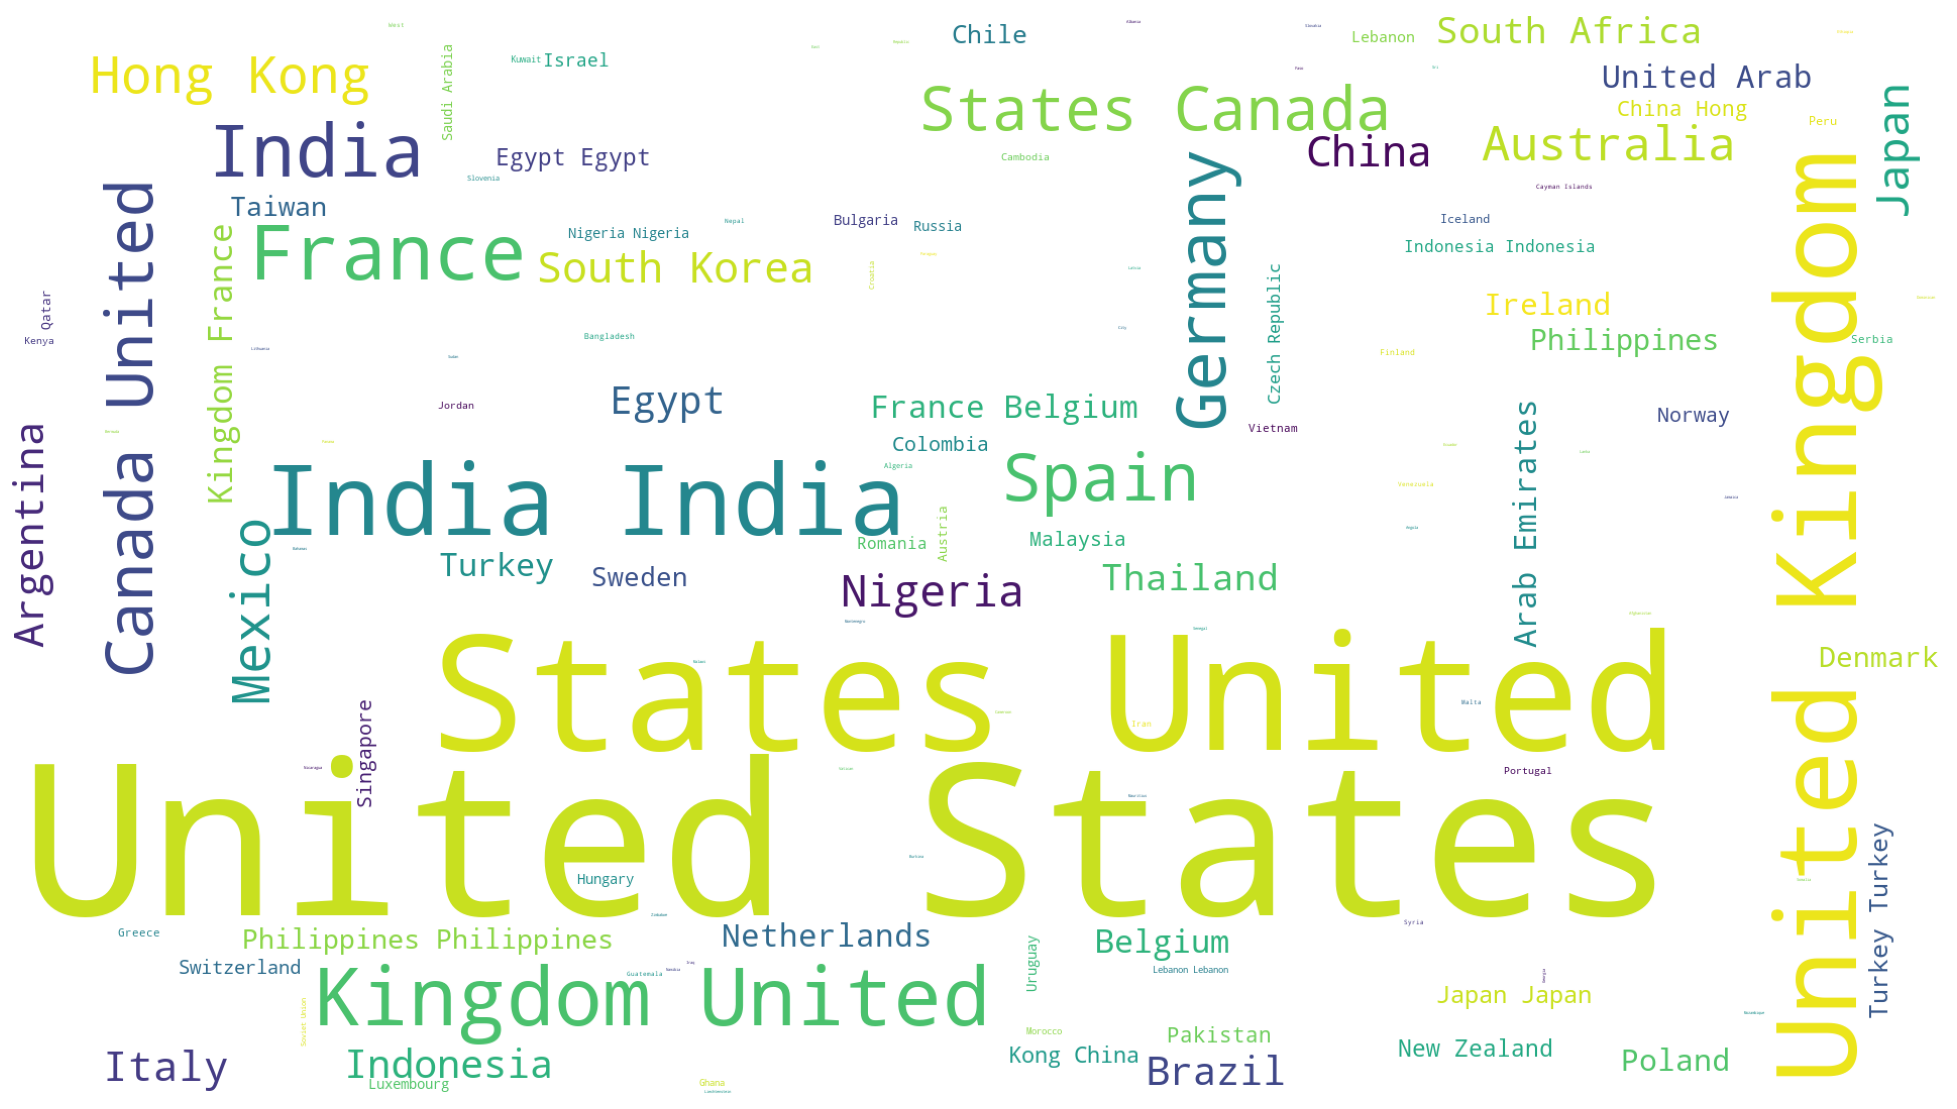

In [75]:
plt.subplots(figsize=(25,15))
wordcloud=WordCloud(
    background_color="white",
    width=1920,
    height=1080,
).generate(" ".join(data.country))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("country.png")
plt.show()

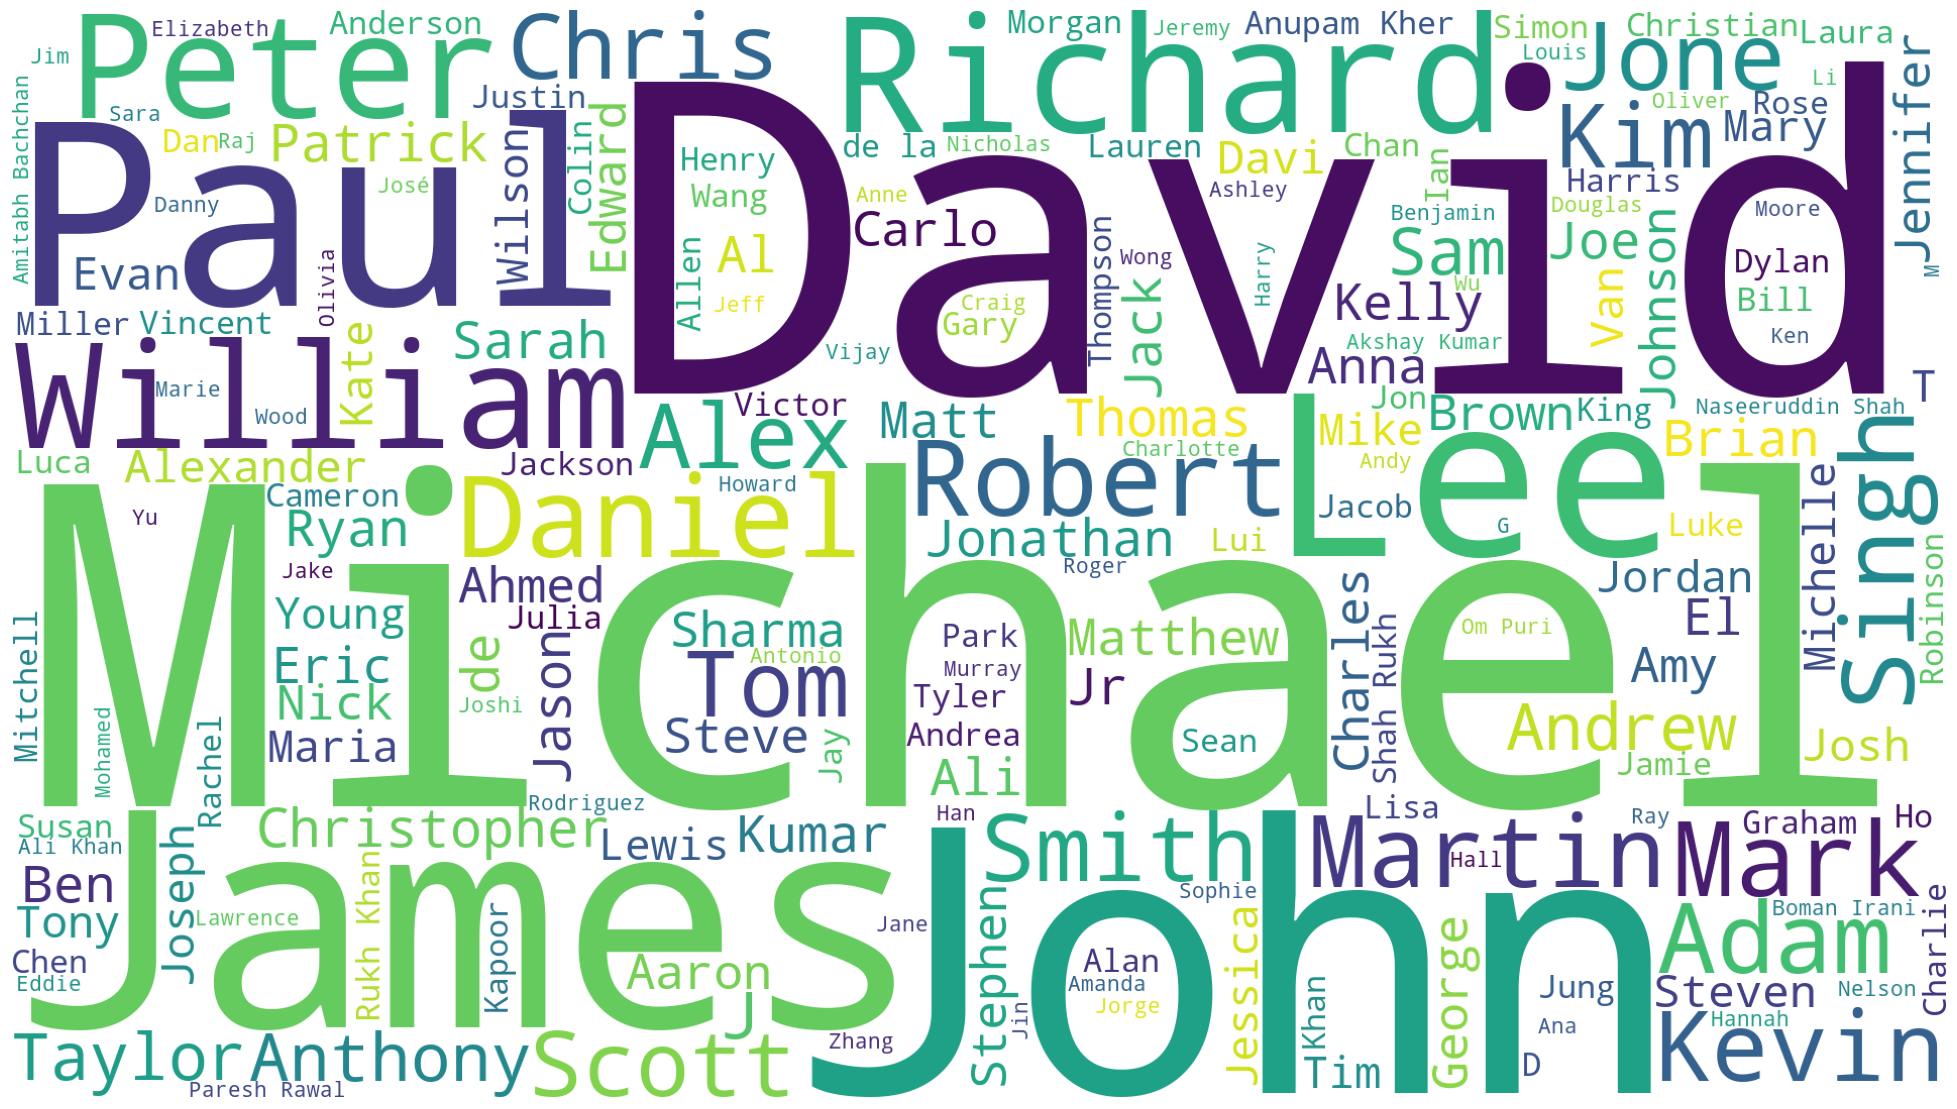

In [77]:
plt.subplots(figsize=(25,15))
wordcloud=WordCloud(
    background_color="white",
    width=1920,
    height=1080,
).generate(" ".join(data.cast))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("cast.png")
plt.show()

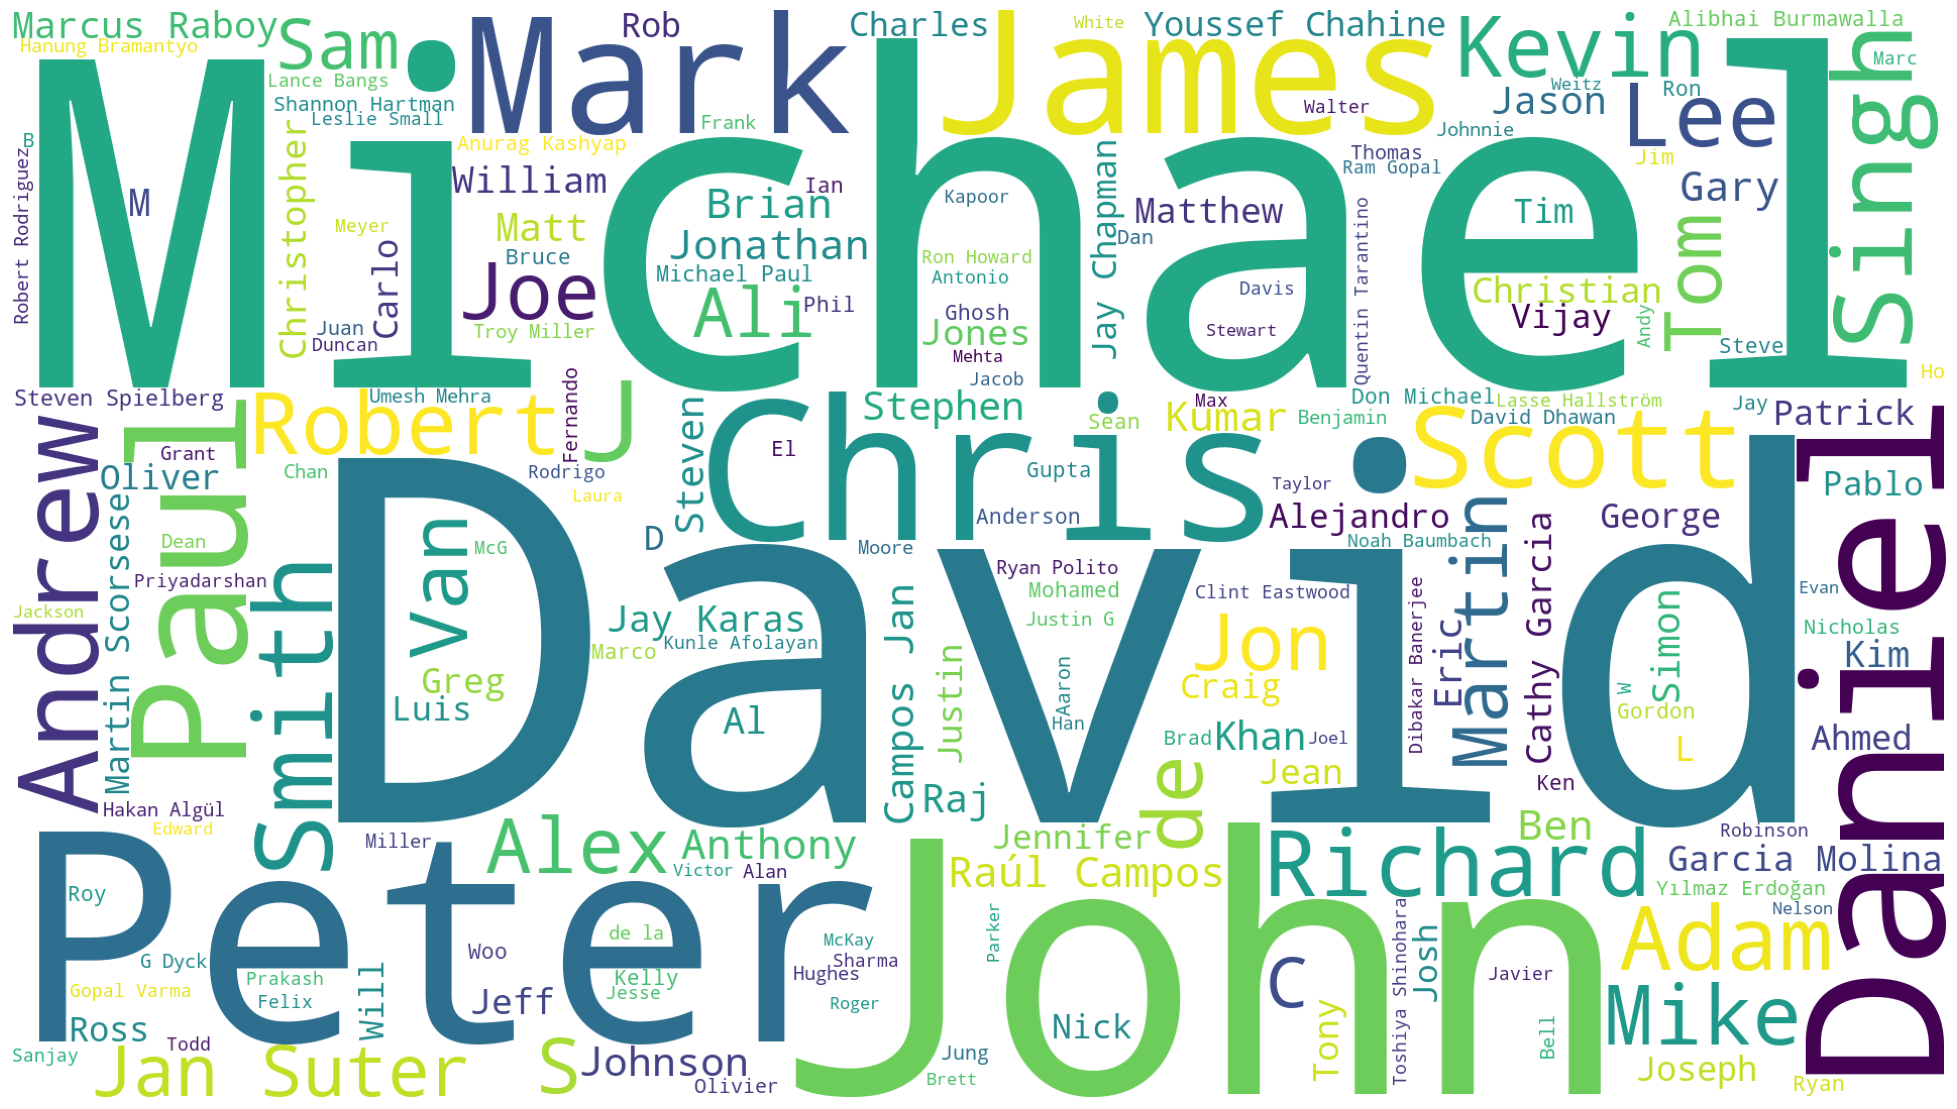

In [79]:
plt.subplots(figsize=(25,15))
wordcloud=WordCloud(
    background_color="white",
    width=1920,
    height=1080,
).generate(" ".join(data.director))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("director.png")
plt.show()